---

## [미니프로젝트] 서울시 공유자전거 '따릉이'의 수요 예측

### 여러분은 서울시 정책 연구원으로서 서울시 공유자전거인 '따릉이'의 수요와 날씨간 연관성을 분석하라는 미션을 부여받았습니다.

#### <font color="blue"> 데이터 분석의 주 목적은 가치있는 정보를 찾아내는것!! </font>

### ▣ 우리가 풀어야 하는 문제는 무엇인가요?

 - 어떠한 날씨요소가 따릉이 수요와 관련 있는지 분석하여 인사이트를 도출해봅시다

맑고, 습하지 않은, 공기가 좋은 날

## ▣ 데이터 소개
[기본 데이터]
* 데이터 : sbikedata.csv

## ▣ 데이터셋의 변수 소개
* date : 날짜
* hour : 시간
* temperature : 온도
* precipitation : 강우 여부, 비가 오지 않았으면 0, 비가 오면 1
* windspeed : 풍속(평균)
* humidity : 습도
* visibility : 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* ozone : 오존 수치
* PM10 : 미세먼지 수치(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* PM2.5 : 초미세먼지 수치(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수

---

### [Step1] 환경 설정
#### <span style="color: green"> 1) 라이브러리 불러오기 </span>

In [1]:
#EDA에 사용할 라이브러리를 import 하세요
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import scipy.stats as spst
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic') # 한글 깨짐

#### <span style="color: green"> 2) 활용할 데이터 불러오기 </span>

In [2]:
#이번 프로젝트에서 분석할 데이터를 불러오세요
data = pd.read_csv("sbikedata.csv")

In [3]:
data.head()

,date,hour,PM10,PM2.5,ozone,temperature,precipitation,windspeed,humidity,visibility,count
0,2021-04-01,1,42.0,21.0,0.002,13.1,0,1.4,49,2000,46
1,2021-04-01,2,41.0,21.0,0.003,12.4,0,2.1,53,2000,40
2,2021-04-01,3,30.0,13.0,0.023,13.1,0,3.4,43,2000,31
3,2021-04-01,4,27.0,12.0,0.028,13.0,0,3.1,44,2000,12
4,2021-04-01,5,29.0,14.0,0.008,13.0,0,2.9,44,2000,30


### [Step2] 가설설정
#### '가설' 이란 단어를 생각해보면, 우리가 직접 가설을 만들어야 할것 같지만 통계에서 분석기법별 귀무가설/대립가설은 정해져있습니다.
- 귀무가설은 차이가 없다, 연관성이 없다, 효과가 없다.
- 대립가설은 차이가 있다, 연관성이 있다, 효과가 있다. 라고 간단하게 이해하시면 좋습니다.

#### 간단한 예로, 온도와 따릉이 대여량간 가설을 수립 해본다면

    - 귀무가설 : 온도와 따릉이 간에는 연관성이 없다.
    - 대립가설 : 온도와 따릉이 간에는 연관성이 있다.

로 가설이 자연스레 수립 됩니다.



---


#### <span style="color: green"> 'precipitation' 등의 변수를 포함하여, 5개 이상의 Feature와 따릉이 대여량 간 가설을 수립해주세요. </span>

##### Guide : Target은 따릉이 대여량 입니다.

- 가설 1(예시) : ㅇ 귀무가설: 강우 여부와 따릉이간에는 연관성이 없다.
    
    ㅇ 대립가설 : 강우 여부와 따릉이 대여량 간에는 연관성이 있다.


- 가설 2 : 오존 농도와 따릉이 대여 간에는 연관성이 없다.

- 가설 3 : 습도와 따릉이 대여 간에는 연관성이 있다.

- 가설 4 : 풍속과 따릉이 대여 간에는 연관성이 없다.

- 가설 5 : 강우 여부와 따릉이 대여 간에는 연관성이 있다.

- 가설 6 : 온도와 따릉이 대여 간에는 연관성이 있다.

### [Step3] 단변량 분석

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

### Feature1 : hour

1. 변수가 내포하고 있는 의미

- 변수의 의미를 한번 짚고 넘어갑시다.
hour 변수는 어떤 의미를 가지고 있나요?

2. 변수가 수치형인지 범주형인지


In [4]:
#변수의 자료형을 확인해보세요.
data['hour'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: hour
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [5]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['hour'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [6]:
#변수의 기초 통계량을 확인해보세요.
data['hour'].describe()

count    5827.000000
mean       11.506607
std         6.921963
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        23.000000
Name: hour, dtype: float64

5. 변수의 분포 확인

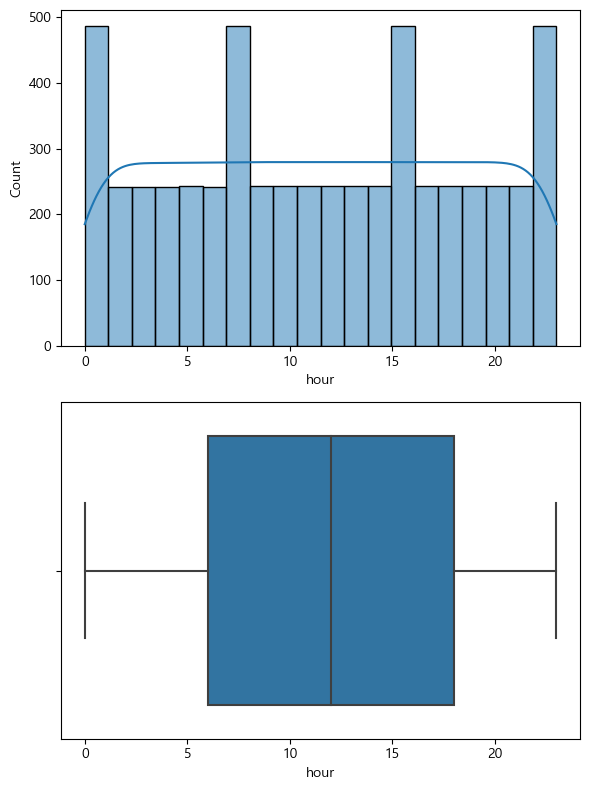

In [7]:
#변수의 분포를 확인해보세요.
var = 'hour'
plt.figure(figsize = (6,8))
plt.subplot(2,1,1)
sns.histplot(data[var], bins = 20, kde=True)

plt.subplot(2,1,2)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [8]:
#위 정보로부터 파악하신 내용을 정리해보세요.


+ 따릉이 대여는 주로 아침 이후 ~ 저녁 전 시간에 이뤄짐

7. 추가 분석사항 도출

In [9]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature2 : temperature

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

+ 따릉이 대여 시의 기온 

2. 변수가 수치형인지 범주형인지


In [10]:
#변수의 자료형을 확인해보세요.
data['temperature']

0       13.1
1       12.4
2       13.1
3       13.0
4       13.0
        ... 
5822     9.3
5823     8.4
5824     8.6
5825     8.2
5826     7.9
Name: temperature, Length: 5827, dtype: float64

실수 데이터

3. 변수의 결측치 존재 여부 및 조치방안

In [11]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['temperature'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [12]:
#변수의 기초 통계량을 확인해보세요
data['temperature'].describe()

count    5827.000000
mean       19.376798
std         7.501572
min        -3.500000
25%        14.100000
50%        20.400000
75%        24.900000
max        36.300000
Name: temperature, dtype: float64

5. 변수의 분포 확인

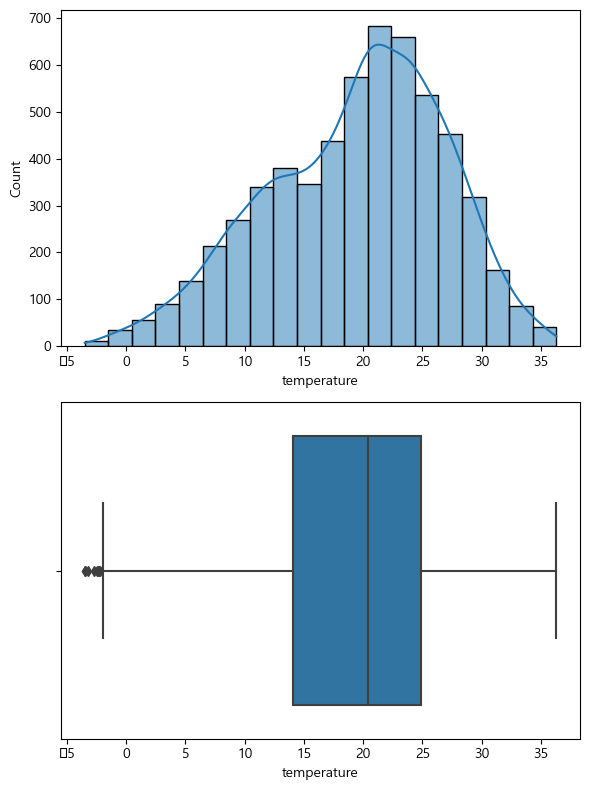

In [13]:
#변수의 분포를 확인해보세요.
var = 'temperature'
plt.figure(figsize = (6,8))
plt.subplot(2,1,1)
sns.histplot(data[var], bins = 20, kde=True)
plt.subplot(2,1,2)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [14]:
#위 정보로부터 파악하신 내용을 정리해보세요.

+ 따릉이 대여는 주로 15~25도 대에서 응집되어있고, 평균 온도는 20도

7. 추가 분석사항 도출

In [15]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature3 : precipitation

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [16]:
#변수의 자료형을 확인해보세요.
data['precipitation'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: precipitation
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [17]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['precipitation'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [18]:
#변수의 기초 통계량을 확인해보세요
data['precipitation'].describe()

count    5827.000000
mean        0.075511
std         0.264236
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: precipitation, dtype: float64

5. 변수의 분포 확인

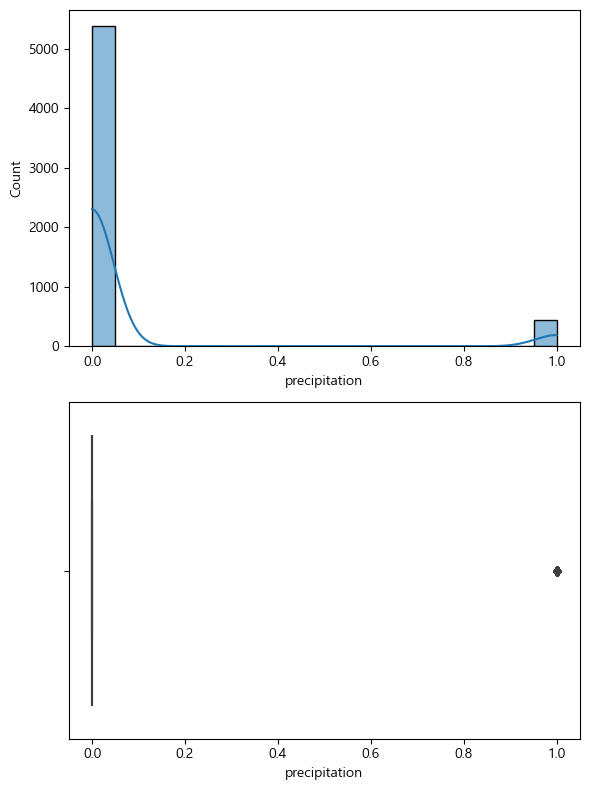

In [19]:
#변수의 분포를 확인해보세요.
var = 'precipitation'
plt.figure(figsize = (6,8))
plt.subplot(2,1,1)
sns.histplot(data[var], bins = 20, kde=True)

plt.subplot(2,1,2)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [20]:
#위 정보로부터 파악하신 내용을 정리해보세요.

+ 해당 데이터는 비가 온 여부에 대한 데이터로, 범주형
+ 따릉이 대여가 0일 때 압도적으로 많음 -> 비가 오지 않은 날 대여

7. 추가 분석사항 도출

In [21]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature4 : windspeed

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [22]:
#변수의 자료형을 확인해보세요.
data['windspeed'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: windspeed
Non-Null Count  Dtype  
--------------  -----  
5827 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [23]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['windspeed'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [24]:
#변수의 기초 통계량을 확인해보세요
data['windspeed'].describe()

count    5827.000000
mean        2.237601
std         1.054516
min         0.000000
25%         1.500000
50%         2.200000
75%         2.800000
max         8.300000
Name: windspeed, dtype: float64

5. 변수의 분포 확인

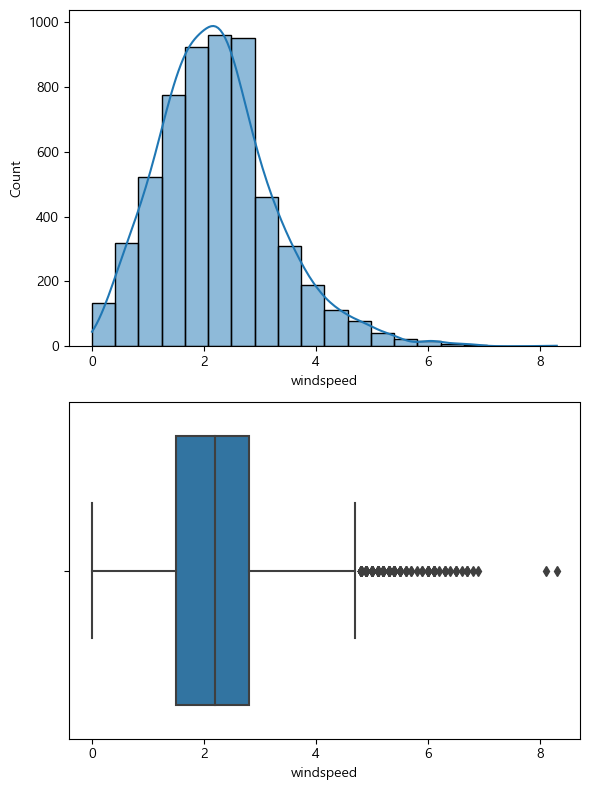

In [25]:
#변수의 분포를 확인해보세요.
var = 'windspeed'
plt.figure(figsize = (6,8))
plt.subplot(2,1,1)
sns.histplot(data[var], bins = 20, kde=True)

plt.subplot(2,1,2)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [26]:
#위 정보로부터 파악하신 내용을 정리해보세요.

+ 대부분의 데이터가 1.5~2.8 사이에 모여있음

7. 추가 분석사항 도출

In [27]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature5 : humidity

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [28]:
#변수의 자료형을 확인해보세요.
data['humidity'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: humidity
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [29]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['humidity'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [30]:
#변수의 기초 통계량을 확인해보세요
data['humidity'].describe()

count    5827.000000
mean       68.608718
std        17.277266
min        19.000000
25%        56.000000
50%        70.000000
75%        82.000000
max       100.000000
Name: humidity, dtype: float64

5. 변수의 분포 확인

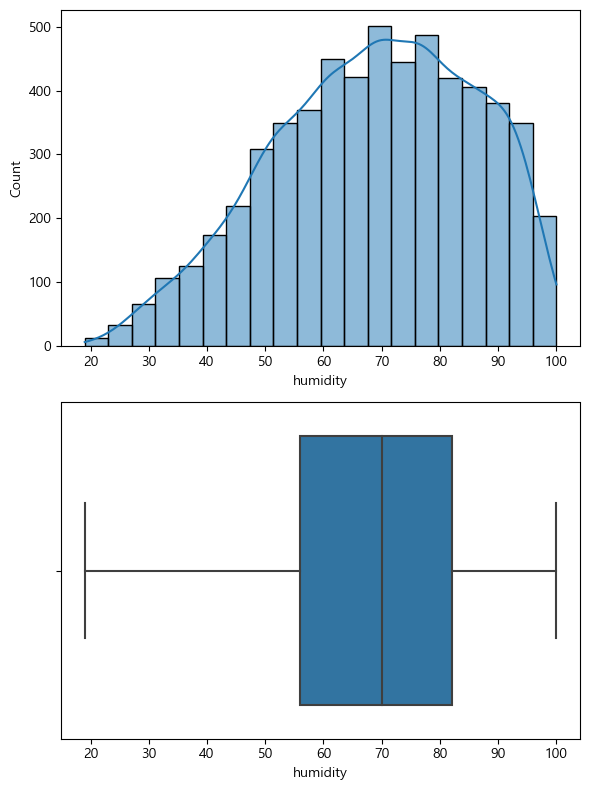

In [31]:
#변수의 분포를 확인해보세요.

var = 'humidity'
plt.figure(figsize = (6,8))
plt.subplot(2,1,1)
sns.histplot(data[var], bins = 20, kde=True)

plt.subplot(2,1,2)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [32]:
#위 정보로부터 파악하신 내용을 정리해보세요.



+ 습도가 56~82 사이일 때 대여가 많음
+ 평균 68 중간값 70

7. 추가 분석사항 도출

In [33]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature6 : visibility

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [34]:
#변수의 자료형을 확인해보세요.
data['visibility'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: visibility
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [35]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['visibility'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [36]:
#변수의 기초 통계량을 확인해보세요
data['visibility'].describe()

count    5827.000000
mean     1758.438648
std       490.969394
min        60.000000
25%      1935.500000
50%      2000.000000
75%      2000.000000
max      2000.000000
Name: visibility, dtype: float64

5. 변수의 분포 확인

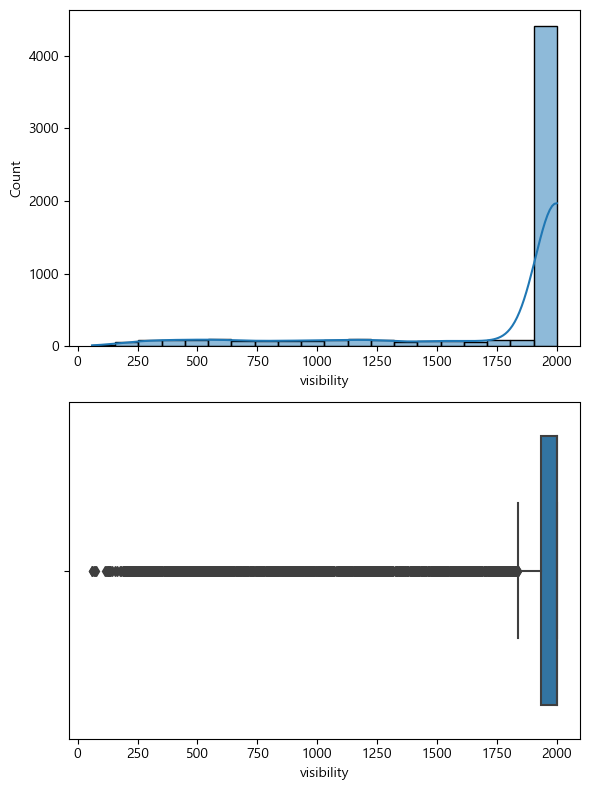

In [37]:
#변수의 분포를 확인해보세요.

var = 'visibility'
plt.figure(figsize = (6,8))
plt.subplot(2,1,1)
sns.histplot(data[var], bins = 20, kde=True)

plt.subplot(2,1,2)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [38]:
#위 정보로부터 파악하신 내용을 정리해보세요.

+ 따릉이의 대여는 2000 부근에서 절반이상 많음

7. 추가 분석사항 도출

In [39]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

+ 2000 부근 데이터 제외 분석

### Feature7 : ozone

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [40]:
#변수의 자료형을 확인해보세요.

data['ozone'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: ozone
Non-Null Count  Dtype  
--------------  -----  
5699 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [41]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['ozone'].isnull().sum()

128

4. 변수의 기초 통계량 확인

In [42]:
#변수의 기초 통계량을 확인해보세요
data['ozone'].describe()

count    5699.000000
mean        0.031811
std         0.018277
min         0.001000
25%         0.019000
50%         0.031000
75%         0.041000
max         0.137000
Name: ozone, dtype: float64

5. 변수의 분포 확인

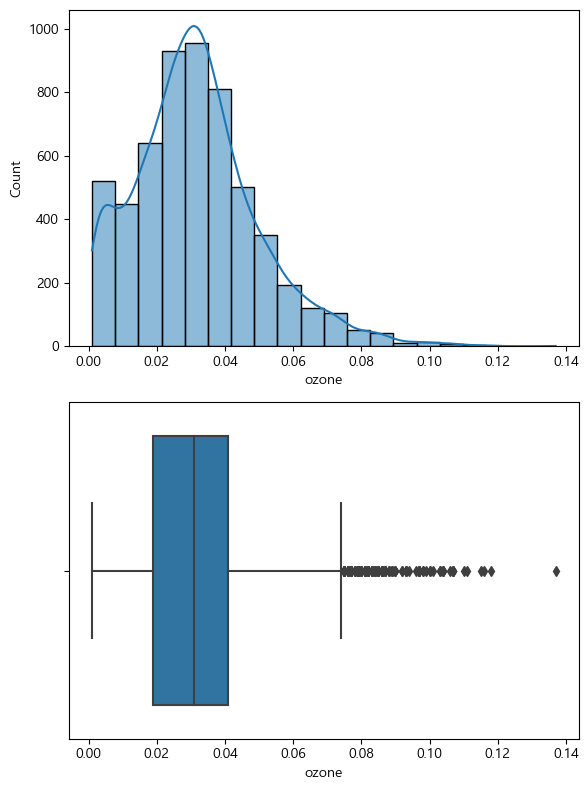

In [43]:
#변수의 분포를 확인해보세요.

var = 'ozone'
plt.figure(figsize = (6,8))
plt.subplot(2,1,1)
sns.histplot(data[var], bins = 20, kde=True)

plt.subplot(2,1,2)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [44]:
#위 정보로부터 파악하신 내용을 정리해보세요.

+ 0.19~0.41 사이에 데이터의 50% 밀집
+ 중간값 및 평균 0.3 부근
+ 결측치 존재

7. 추가 분석사항 도출

In [45]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Feature8 : PM10

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [46]:
#변수의 자료형을 확인해보세요.
data['PM10'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM10
Non-Null Count  Dtype  
--------------  -----  
5725 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [47]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['PM10'].isnull().sum()

102

4. 변수의 기초 통계량 확인

In [48]:
#변수의 기초 통계량을 확인해보세요
data['PM10'].describe()

count    5725.000000
mean       31.970655
std        42.987292
min         3.000000
25%        16.000000
50%        25.000000
75%        37.000000
max       827.000000
Name: PM10, dtype: float64

5. 변수의 분포 확인

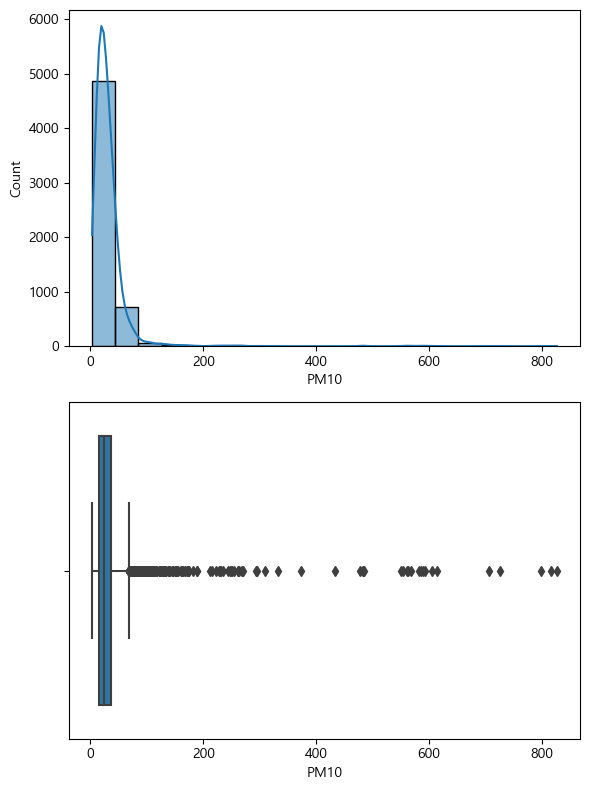

In [49]:
#변수의 분포를 확인해보세요.

var = 'PM10'
plt.figure(figsize = (6,8))
plt.subplot(2,1,1)
sns.histplot(data[var], bins = 20, kde=True)

plt.subplot(2,1,2)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [50]:
#위 정보로부터 파악하신 내용을 정리해보세요.

+ 16~37 사이 데이터가 
+ 결측치 존재

7. 추가 분석사항 도출

In [51]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.


### Feature9 : PM2.5

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

2. 변수가 수치형인지 범주형인지


In [52]:
#변수의 자료형을 확인해보세요.
data['PM2.5'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: PM2.5
Non-Null Count  Dtype  
--------------  -----  
5732 non-null   float64
dtypes: float64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [53]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['PM2.5'].isnull().sum()

95

4. 변수의 기초 통계량 확인

In [54]:
#변수의 기초 통계량을 확인해보세요
data['PM2.5'].describe()

count    5732.000000
mean       15.666609
std        13.850990
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

5. 변수의 분포 확인

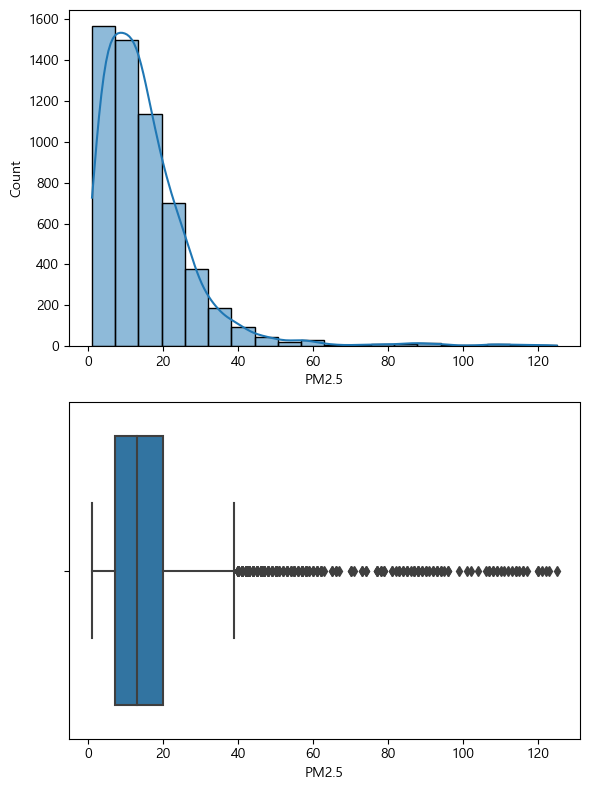

In [55]:
#변수의 분포를 확인해보세요.

var = 'PM2.5'
plt.figure(figsize = (6,8))
plt.subplot(2,1,1)
sns.histplot(data[var], bins = 20, kde=True)

plt.subplot(2,1,2)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [56]:
#위 정보로부터 파악하신 내용을 정리해보세요.

+ 7~20 사이 대부분의 데이터 존재
+ 결측치 존재

7. 추가 분석사항 도출

In [57]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

### Count (Target)

1. 변수가 내포하고 있는 의미
- 변수의 의미를 한번 짚고 넘어갑시다. 여러분이 생각하는 이 변수의 의미를 작성해보세요.

+ 시간 당 따릉이 대여 댓수

2. 변수가 수치형인지 범주형인지


In [58]:
#변수의 자료형을 확인해보세요.
data['count'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5827 entries, 0 to 5826
Series name: count
Non-Null Count  Dtype
--------------  -----
5827 non-null   int64
dtypes: int64(1)
memory usage: 45.6 KB


3. 변수의 결측치 존재 여부 및 조치방안

In [59]:
#변수의 결측치 존재 여부를 확인하고, 만약 결측치가 존재하면 어떻게 처리할지 고민해보세요. 
data['count'].isnull().sum()

0

4. 변수의 기초 통계량 확인

In [60]:
#변수의 기초 통계량을 확인해보세요
data['count'].describe()

count    5827.000000
mean      215.117899
std       185.972900
min         1.000000
25%        53.000000
50%       186.000000
75%       315.000000
max      1746.000000
Name: count, dtype: float64

5. 변수의 분포 확인

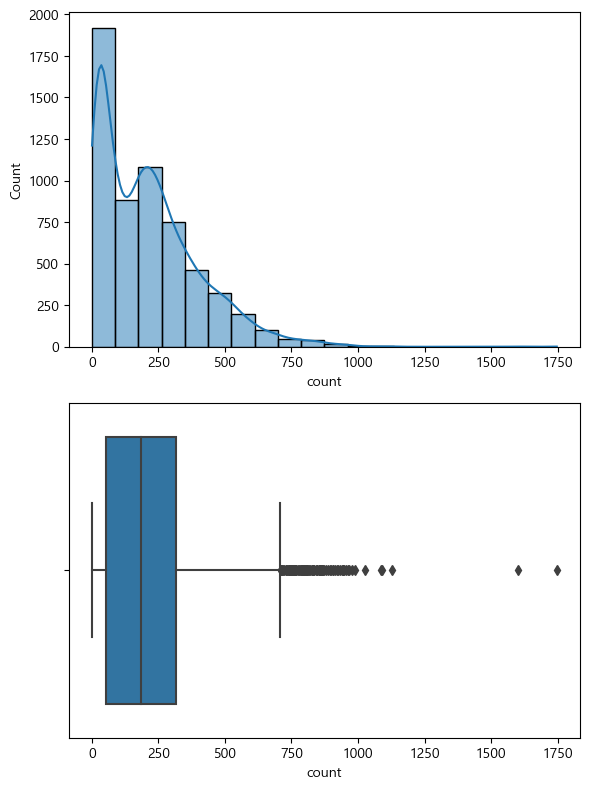

In [61]:
#변수의 분포를 확인해보세요.

var = 'count'
plt.figure(figsize = (6,8))
plt.subplot(2,1,1)
sns.histplot(data[var], bins = 20, kde=True)

plt.subplot(2,1,2)
sns.boxplot(data[var])

plt.tight_layout()
plt.show()

6. 위 정보로 부터 파악한 내용 정리

In [62]:
#위 정보로부터 파악하신 내용을 정리해보세요.

+ 평균 대여량 215
+ 분포 대부분 53~315 사이

7. 추가 분석사항 도출

In [63]:
#추가로 분석을 원하는 부분이 있다면 분석후 정리해보세요.

# 결측치 처리

In [64]:
data.isnull().sum()

date               0
hour               0
PM10             102
PM2.5             95
ozone            128
temperature        0
precipitation      0
windspeed          0
humidity           0
visibility         0
count              0
dtype: int64

In [65]:
# 1. 중간값으로 대체
mdf = data.copy()
mdf['PM10'].fillna(mdf['PM10'].median(), inplace=True)
mdf['PM2.5'].fillna(mdf['PM2.5'].median(), inplace=True)
mdf['ozone'].fillna(mdf['ozone'].median(), inplace=True)

# 2. 결측치 제거
df = data.copy()
df = df.dropna()

In [66]:
mdf.isnull().sum()

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
dtype: int64

In [67]:
df.isnull().sum()

date             0
hour             0
PM10             0
PM2.5            0
ozone            0
temperature      0
precipitation    0
windspeed        0
humidity         0
visibility       0
count            0
dtype: int64

In [68]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5827 non-null   object 
 1   hour           5827 non-null   int64  
 2   PM10           5827 non-null   float64
 3   PM2.5          5827 non-null   float64
 4   ozone          5827 non-null   float64
 5   temperature    5827 non-null   float64
 6   precipitation  5827 non-null   int64  
 7   windspeed      5827 non-null   float64
 8   humidity       5827 non-null   int64  
 9   visibility     5827 non-null   int64  
 10  count          5827 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 500.9+ KB


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5670 entries, 0 to 5826
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           5670 non-null   object 
 1   hour           5670 non-null   int64  
 2   PM10           5670 non-null   float64
 3   PM2.5          5670 non-null   float64
 4   ozone          5670 non-null   float64
 5   temperature    5670 non-null   float64
 6   precipitation  5670 non-null   int64  
 7   windspeed      5670 non-null   float64
 8   humidity       5670 non-null   int64  
 9   visibility     5670 non-null   int64  
 10  count          5670 non-null   int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 531.6+ KB


### [Step4] 이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)을 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [70]:
def corrPlot(var, target):
    plt.figure(figsize = (12,8))
    sns.regplot(x=var, y=target, data=df)
    plt.title(f'{var} 와(과) {target} 의 상관관계')
    plt.show()
    
    result =  spst.pearsonr(df[var], df[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')
    

    # pm, ozone의 경우 결측치 제거 데이터와 결측치 대체 데이터의 두 결과를 보기 위함
def corrPlot_nan(var1, target1):
    plt.figure(figsize = (12,8))
    plt.subplot(2,1,1)
    sns.regplot(x=var1, y=target1,data=df)
    plt.title(f'{var1} 와(과) {target1} 의 상관관계 - 결측치 제거 데이터')
    
    plt.subplot(2,1,2)
    sns.regplot(x=var1, y=target1, data=mdf)
    plt.title(f'{var1} 와(과) {target1} 의 상관관계 - 결측치 대체 데이터')
    plt.show()
    
    result1, result2 =  spst.pearsonr(df[var1], df[target1]), spst.pearsonr(mdf[var1], mdf[target1])
    print(f'상관계수 : {result1[0]}, p-value : {result1[1]}')
    print(f'상관계수 : {result2[0]}, p-value : {result2[1]}')

#### (1) 범주형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.</font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : t-test, anova
        3. 관계 평가 (가설 검정)

In [71]:
def snsbarplot(var, target):
    sns.barplot(x= var, y= target, data=df)
    plt.grid()
    plt.title(f'{var} 와(과) {target} 의 상관관계')
    plt.show()
    
#     sns.barplot(x=var, y=target, data=mdf)
#     plt.grid()
#     plt.title(f'{var} 와(과) {target} 의 상관관계 - 결측치 처리 데이터')
#     plt.show()

1. 강수 여부와 따릉이 대여량간 이변량 분석

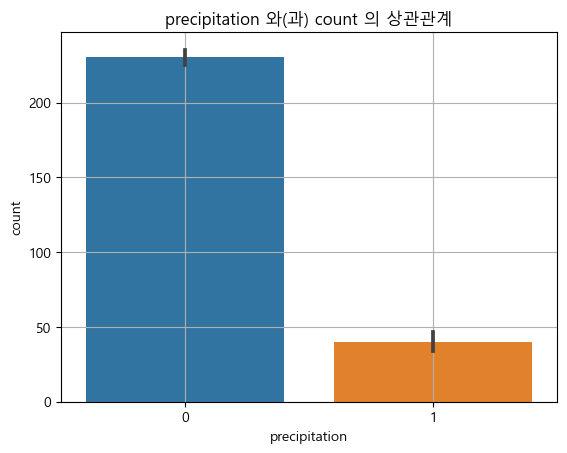

In [72]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
snsbarplot('precipitation', 'count')

In [73]:
nrain = df.loc[df['precipitation']== 0, 'count']
rain = df.loc[df['precipitation']== 1, 'count']

spst.ttest_ind(nrain, rain)

Ttest_indResult(statistic=20.998879971563788, pvalue=2.428442706503082e-94)

## => 강수량과 따릉이 대여 간에는 연관이 있다.

#### (2) 숫자형 Feature --> 숫자형 Y (따릉이 대여 Count)

<font color="green">* 모든 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  </font>


        1. 시각화 : 그래프를 활용한 데이터 분석
        2. 수치화 : 상관분석
        3. 관계 평가 (가설 검정)

2. 시간대별 데이터와 따릉이 대여량간 분석

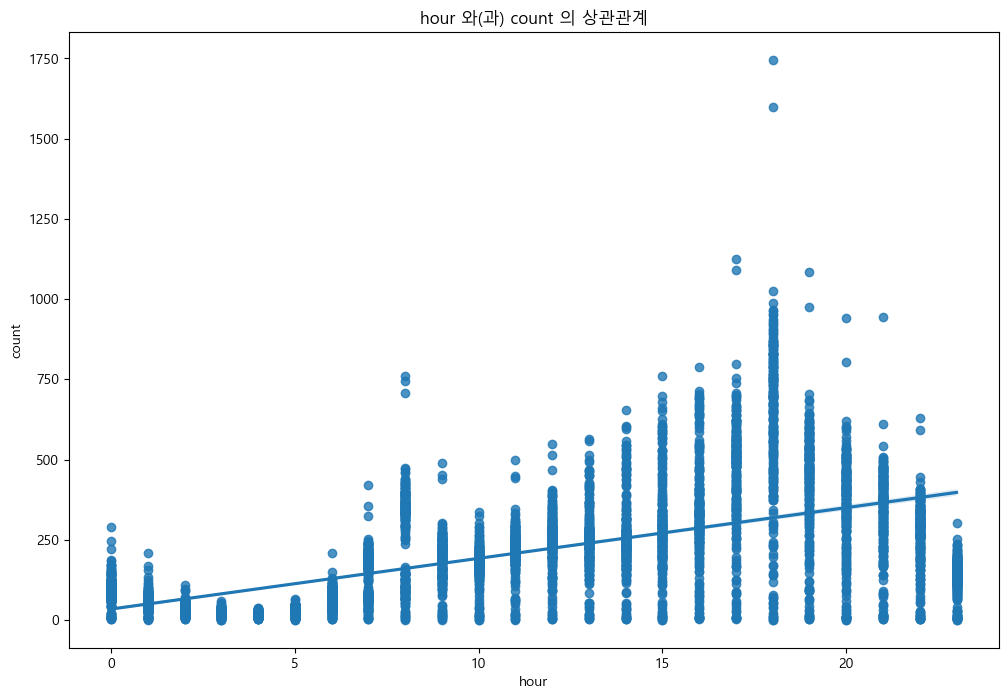

상관계수 : 0.587558535914158, p-value : 0.0


In [74]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
corrPlot('hour', 'count')

### => 따릉이 대여 시간대와 대여량에는 상관관계가 존재한다.

3. 온도 데이터와 따릉이 대여량간 분석

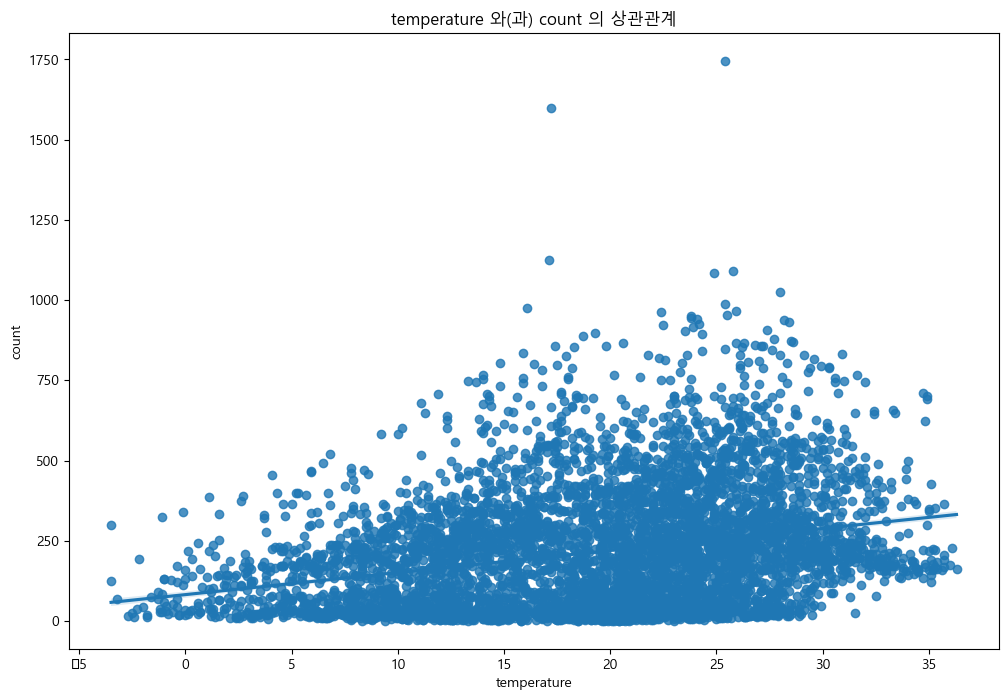

상관계수 : 0.27416222788541533, p-value : 2.585011313554534e-98


In [75]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
corrPlot('temperature', 'count')

In [76]:
temp = df[(df['temperature']>=5)&(df['temperature']<=25)].copy()

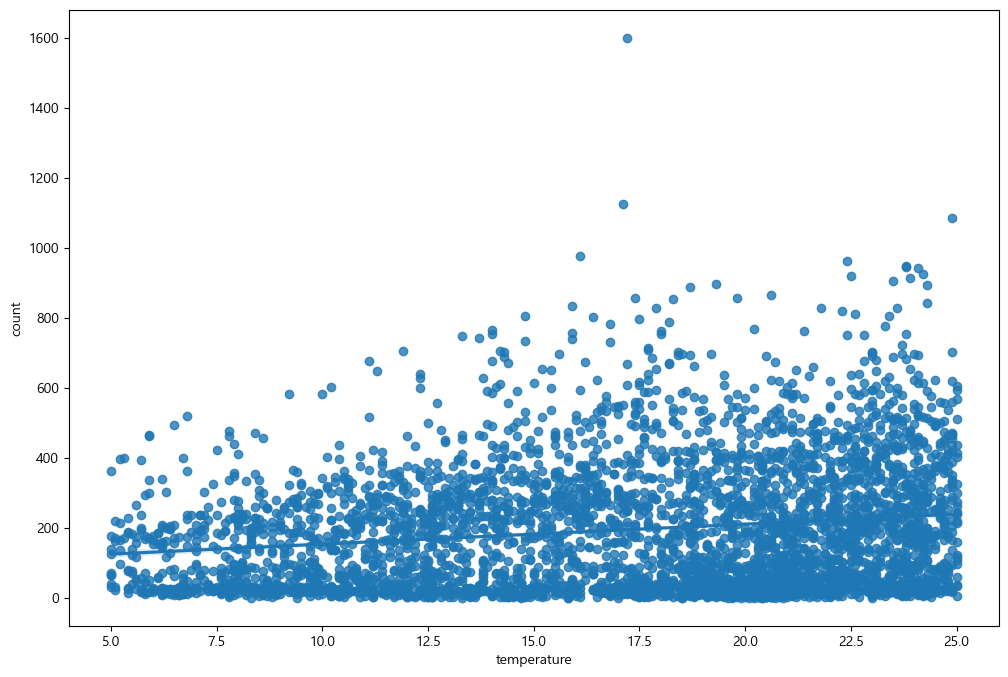

상관계수 : 0.1696838551333844, p-value : 9.269744510703801e-28


In [77]:
plt.figure(figsize = (12,8))
sns.regplot(x='temperature', y='count', data=temp)
plt.show()
    
result =  spst.pearsonr(temp['temperature'], temp['count'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

### => 온도와 따릉이 대여량 간에는 약한 상관관계가 존재한다.

4. 풍속 데이터와 따릉이 대여량간 분석

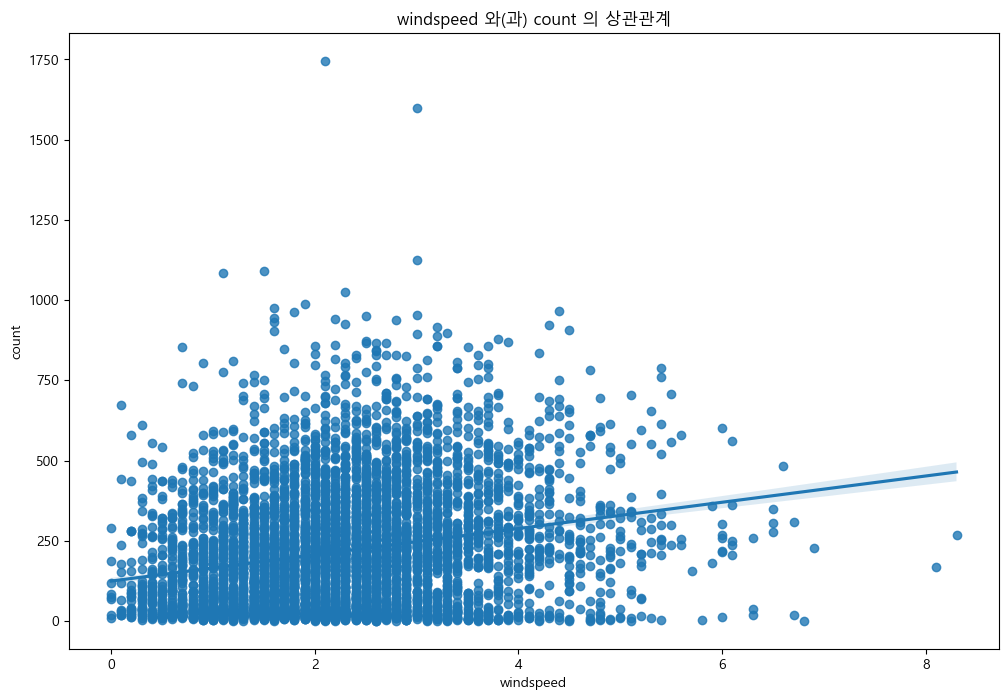

상관계수 : 0.22922151636418522, p-value : 1.7134562728138145e-68


In [78]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
corrPlot('windspeed', 'count')

### => 풍속과 따릉이 대여량 간에 약한 상관관계가 존재한다.

5. 습도 데이터와 따릉이 대여량간 분석

In [79]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
corrPlot('humidity', 'count')

상관계수 : -0.48074217482491177, p-value : 0.0


### => 습도와 따릉이 대여량 간에는 상관관계가 존재한다.

6. 시정 데이터와 따릉이 대여량간 분석

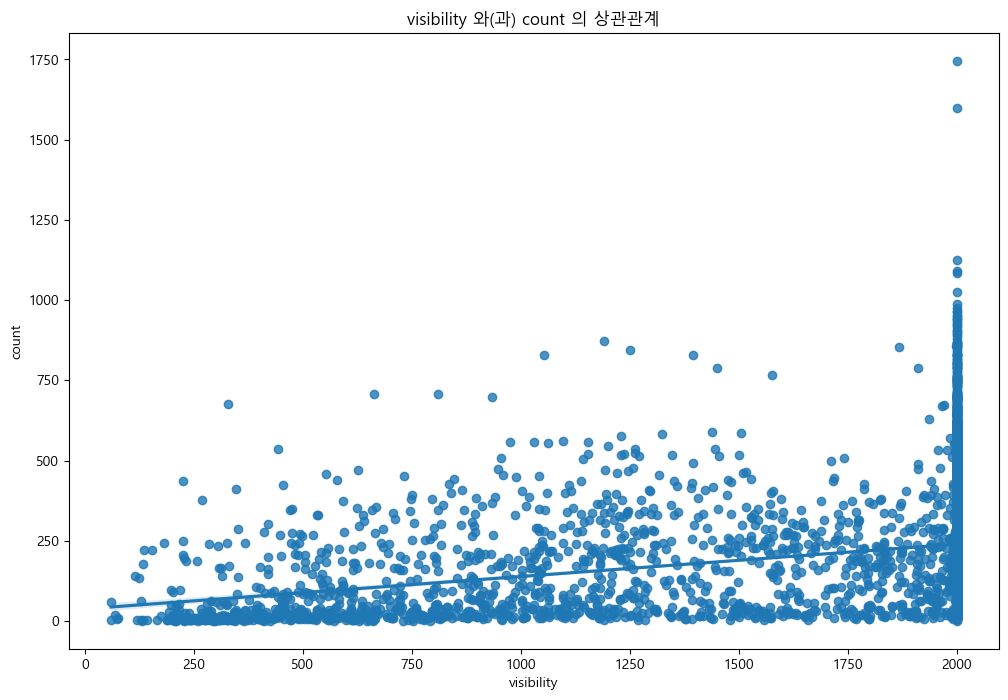

상관계수 : 0.26207314766928064, p-value : 1.0691328205534822e-89


In [80]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
corrPlot('visibility', 'count')

### => 가시성과 따릉이 대여량 간에는 약한 상관관계가 존재한다.

7. 오존 데이터와 따릉이 대여량간 분석

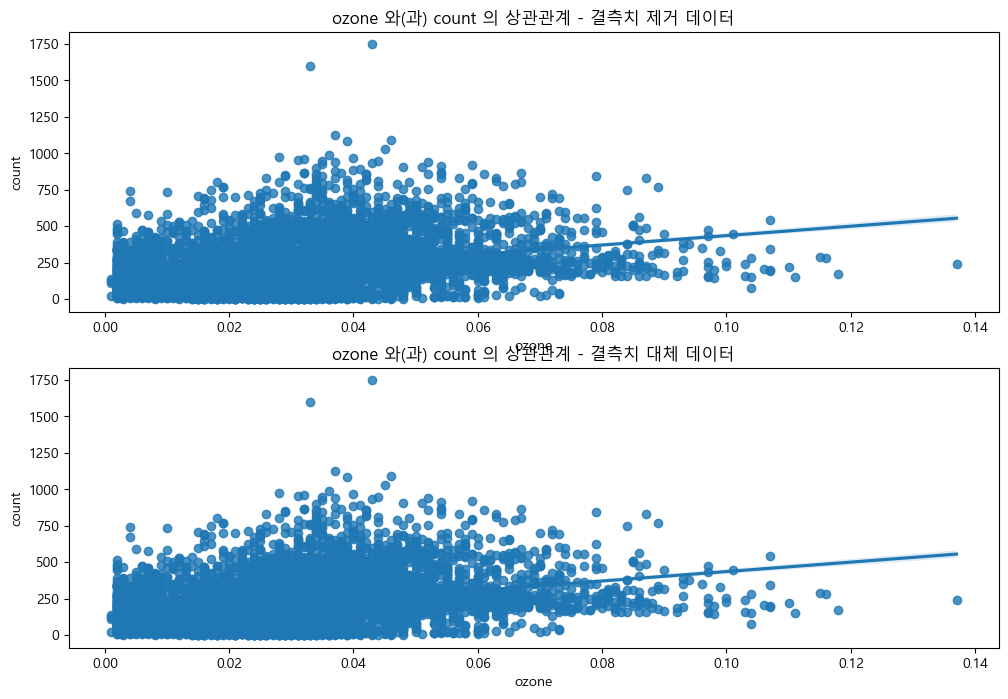

상관계수 : 0.3143357943088431, p-value : 3.025523189274068e-130
상관계수 : 0.31453346787674397, p-value : 5.666600575663641e-134


In [81]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
corrPlot_nan('ozone', 'count')

### => 오존과 대여량 간에는 약한 상관관계가 존재한다.

8. 미세먼지 농도 데이터와 따릉이 대여량간 분석

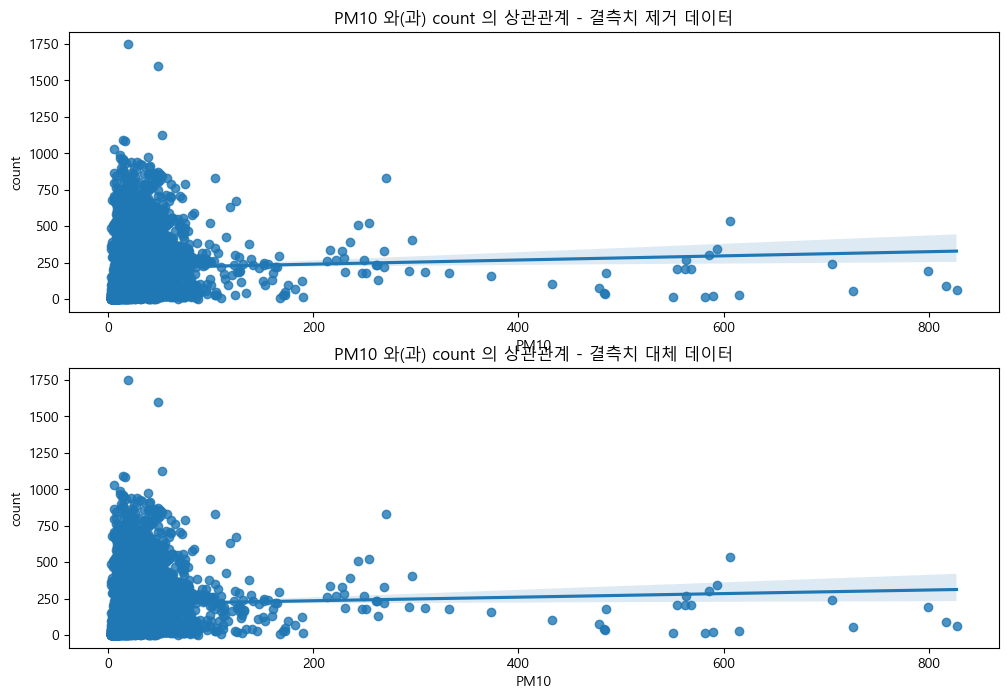

상관계수 : 0.03262773163856617, p-value : 0.01401178505403581
상관계수 : 0.028147495329876437, p-value : 0.03166629421776603


In [82]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
corrPlot_nan('PM10', 'count')

### => 미세먼지 농도와 따릉이 대여량 간에는 유의미한 상관관계가 없어보임

9. 초미세먼지 농도 데이터와 따릉이 대여량간 분석

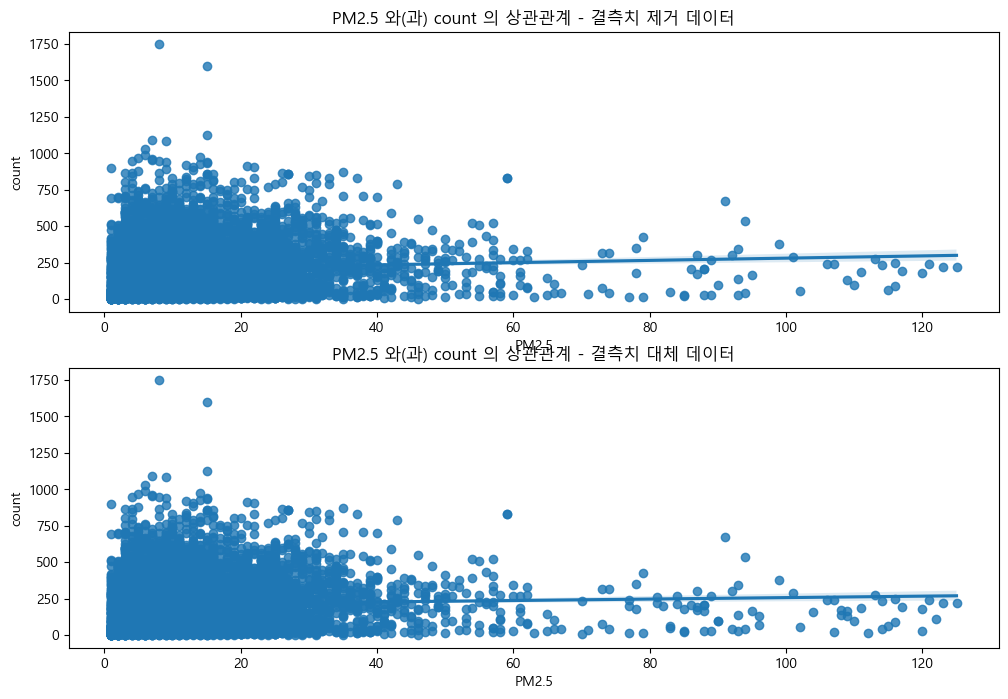

상관계수 : 0.0529237283818275, p-value : 6.690256718116022e-05
상관계수 : 0.0369543440052327, p-value : 0.004783534919966503


In [83]:
#데이터 타입에 주의하여 이변량 분석을 해보세요
corrPlot_nan('PM2.5', 'count')

In [84]:
mdf['PM2.5'].describe()

count    5827.000000
mean       15.623134
std        13.741748
min         1.000000
25%         7.000000
50%        13.000000
75%        20.000000
max       125.000000
Name: PM2.5, dtype: float64

25~75% 범위 내의 값만 분석

In [85]:
pm25 = mdf[(mdf['PM2.5']>= 7) & (mdf['PM2.5']<= 20)].copy()

In [86]:
def pm25_plot(var1, target1):

    sns.regplot(x=var1, y=target1, data=pm25)
    plt.title(f'{var1} 와(과) {target1} 의 상관관계 - 결측치 대체 데이터')
    plt.show()
    
    result1 =  spst.pearsonr(pm25[var1], pm25[target1])
    print(f'상관계수 : {result1[0]}, p-value : {result1[1]}')

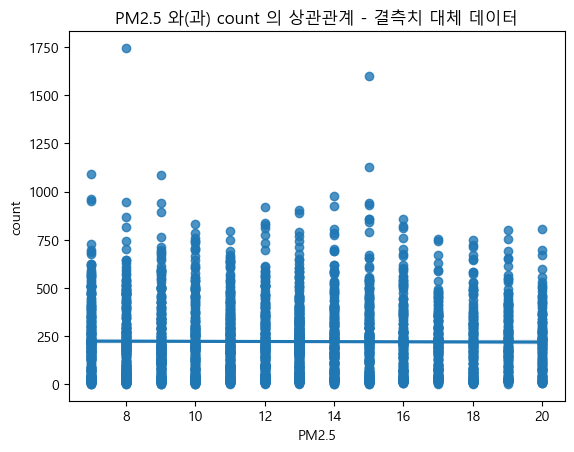

상관계수 : -0.007228767053111469, p-value : 0.6859686846501537


In [87]:
pm25_plot('PM2.5', 'count')

### => 미세먼지 농도와 따릉이 대여량 간에는 유의미한 상관관계가 없어보임

### [Step5] 가설 검정

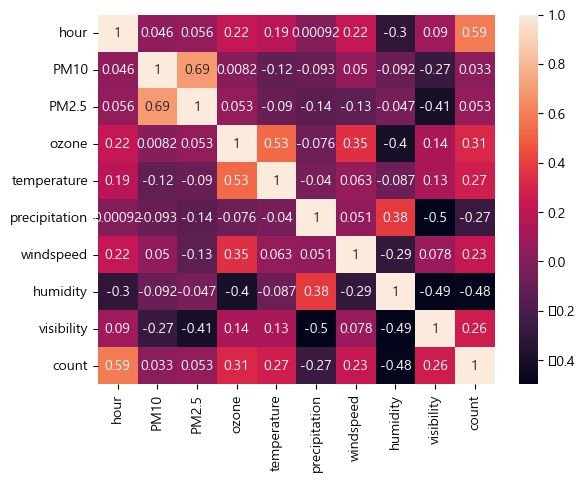

In [88]:
sns.heatmap(df.corr(), annot = True)
plt.show()

#### <font color='green'>1. 강한 관계의 변수 (대립가설 채택)</font>

1. 강수여부와 따릉이 대여량 간에는 유의미한 관계가 있다. 
2. 습도와 대여량 간에는 유의미한 상관 관계가 있다. 
3. 시간대와 대여량 간에는 유의미한 상관 관계가 있다. 


#### <font color='green'>2. 약한 관계의 변수 (대립가설 채택)</font>

1. 오존농도와 따릉이 대여량 간에는 약한 상관관계가 있다.
2. 기온과 따릉이 대여량 간에는 약한 상관관계가 있다.
3. 풍속과 따릉이 대여량 간에는 약한 상관관계가 있다.
4. 가시성과 따릉이 대여량 간에는 약한 상관관계가 있다.

#### <font color='green'>3. 관계 없는 변수 (귀무가설 채택)</font>


1. 미세먼지 농도와 따릉이 대여량 간에는 유의미한 상관관계가 없다.
2. 초미세먼지 농도와 따릉이 대여량 간에는 유의미한 상관관계가 없다.

### [Step6] Insight 도출

## [미세먼지 농도 관련]
+ pm10: 좋음 0-30 보통 31-80 나쁨 81-150 매우나쁨 151 이상
+ pm2.5: 좋음 0-15 보통 16-35 나쁨 36-75 매우나쁨 76 이상

In [89]:
# 여기서의 count는 각 카테고리의 빈도수

In [90]:
PM10_c = pd.DataFrame({'category':['good', 'normal', 'bad', 'very bad'], 'count':[len(mdf[(mdf['PM10']<=30)]),len(mdf[(mdf['PM10']>30)&(mdf['PM10']<=80)]),len(mdf[(mdf['PM10']>80)&(mdf['PM10']<=150)]),len(mdf[(mdf['PM10']>151)])]})

In [91]:
PM10_c

,category,count
0,good,3686
1,normal,1976
2,bad,103
3,very bad,61


In [92]:
PM10_c = PM10_c.astype({'count':'int'})

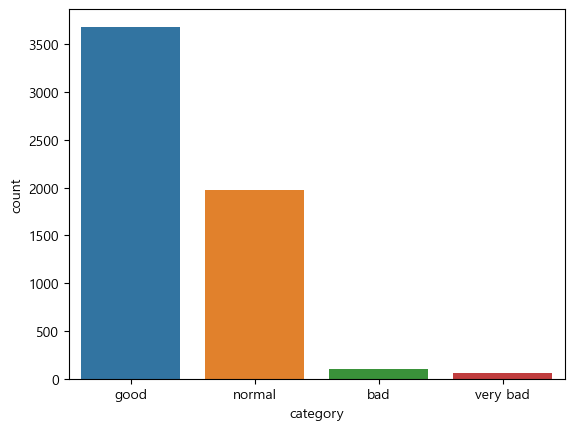

In [93]:
var = 'category'

sns.barplot(x=var, y='count', data = PM10_c)
plt.show()

In [94]:
PM25_c = pd.DataFrame({'category':['good', 'normal', 'bad', 'very bad'],
                        'count':[len(mdf[(mdf['PM2.5']<=15)]),
                                 len(mdf[(mdf['PM2.5']>15)&(mdf['PM2.5']<=35)]),
                                 len(mdf[(mdf['PM2.5']>35)&(mdf['PM2.5']<=75)]),
                                 len(mdf[(mdf['PM2.5']>76)])]})

In [95]:
PM25_c

,category,count
0,good,3598
1,normal,1903
2,bad,259
3,very bad,67


In [96]:
PM25_c = PM25_c.astype({'count':'int'})

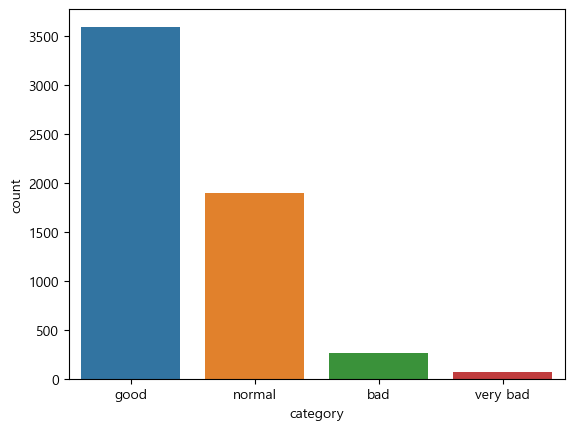

In [97]:
var = 'category'

sns.barplot(x=var, y='count', data = PM25_c)
plt.show()

### ANOVA 분석

In [98]:
# ANOVA 분석을 위해 기존 데이터에 category 칼럼을 추가

In [99]:
PM10 = mdf.copy()
PM25 = mdf.copy()

In [100]:
PM10['category'] = np.where(PM10['PM10']<=80, 'good', 'bad')
PM25['category'] = np.where(PM25['PM2.5']<=35, 'good', 'bad')

In [101]:
PM10_good = PM10[PM10['category']=='good'].copy()
PM10_good['category']= np.where((PM10_good['PM10']<=30), 'good', 'normal')
PM10_bad = PM10[PM10['category']=='bad'].copy()
PM10_bad['category']= np.where((PM10_bad['PM10']>151), 'very bad', 'bad')

In [102]:
PM25_good = PM25[PM25['category']=='good'].copy()
PM25_good['category']= np.where((PM25_good['PM2.5']<=15), 'good', 'normal')
PM25_bad = PM25[PM25['category']=='bad'].copy()
PM25_bad['category']= np.where((PM25_bad['PM2.5']>75), 'very bad', 'bad')

In [103]:
PM10_final = pd.concat([PM10_good, PM10_bad])
PM25_final = pd.concat([PM25_good, PM25_bad])

In [104]:
PM10_final['category'].value_counts()

good        3686
normal      1976
bad          104
very bad      61
Name: category, dtype: int64

In [105]:
PM25_final['category'].value_counts()

good        3598
normal      1903
bad          259
very bad      67
Name: category, dtype: int64

In [106]:
# 그룹별 저장
Pm10_1 = PM10_final.loc[PM10_final.category == 'good', 'count']
Pm10_2 = PM10_final.loc[PM10_final.category == 'normal', 'count']
Pm10_3 = PM10_final.loc[PM10_final.category == 'bad', 'count']
Pm10_4 = PM10_final.loc[PM10_final.category == 'very bad', 'count']

In [107]:
spst.f_oneway(Pm10_1, Pm10_2, Pm10_3, Pm10_4)

F_onewayResult(statistic=19.04291235141456, pvalue=2.759456563802792e-12)

In [108]:
# 그룹별 저장
Pm25_1 = PM25_final.loc[PM25_final.category == 'good', 'count']
Pm25_2 = PM25_final.loc[PM25_final.category == 'normal', 'count']
Pm25_3 = PM25_final.loc[PM25_final.category == 'bad', 'count']
Pm25_4 = PM25_final.loc[PM25_final.category == 'very bad', 'count']

In [109]:
spst.f_oneway(Pm25_1, Pm25_2, Pm25_3, Pm25_4)

F_onewayResult(statistic=5.403503394564394, pvalue=0.0010369770842348566)

미세먼지 농도와 상관관계가 낮게 나온 이유는,
미세먼지 데이터가 [좋고, 평범한 날]에 치중되어 있기 때문
(자전거 이용자에게 좋고 평범한 상황에서의 세부 수치는 크게 중요하지 않을 것이라는 생각이 들음)
=> 범주형으로 나눠서 보면 관계가 있다고 결과를 낼 수 있음